In [96]:
# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

In [86]:
# LEITURA CSV
df = pd.read_csv('titanic-dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
# EXCLUSÃO DE FEATURES DESNECESSÁRIAS
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [88]:
# LABEL ENCODER PARA SEXO
le = LabelEncoder()
df.Sex = le.fit(df.Sex).transform(df.Sex)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


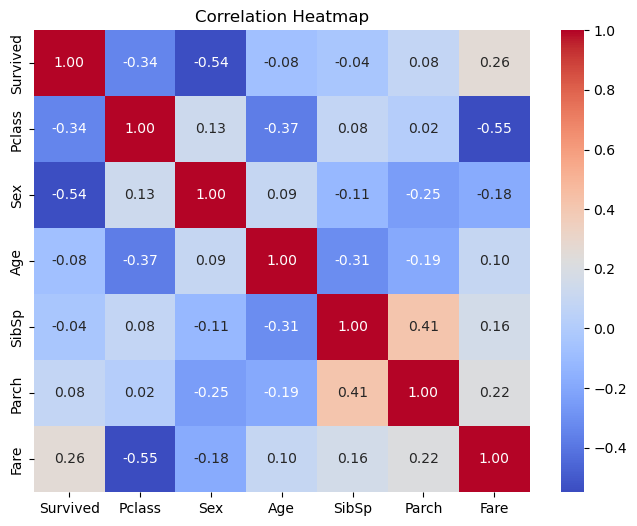

In [89]:
# HEATMAP
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [90]:
# SEPARAÇÃO X E Y
x = df.drop(['Survived'], axis=1)
y = df.Survived

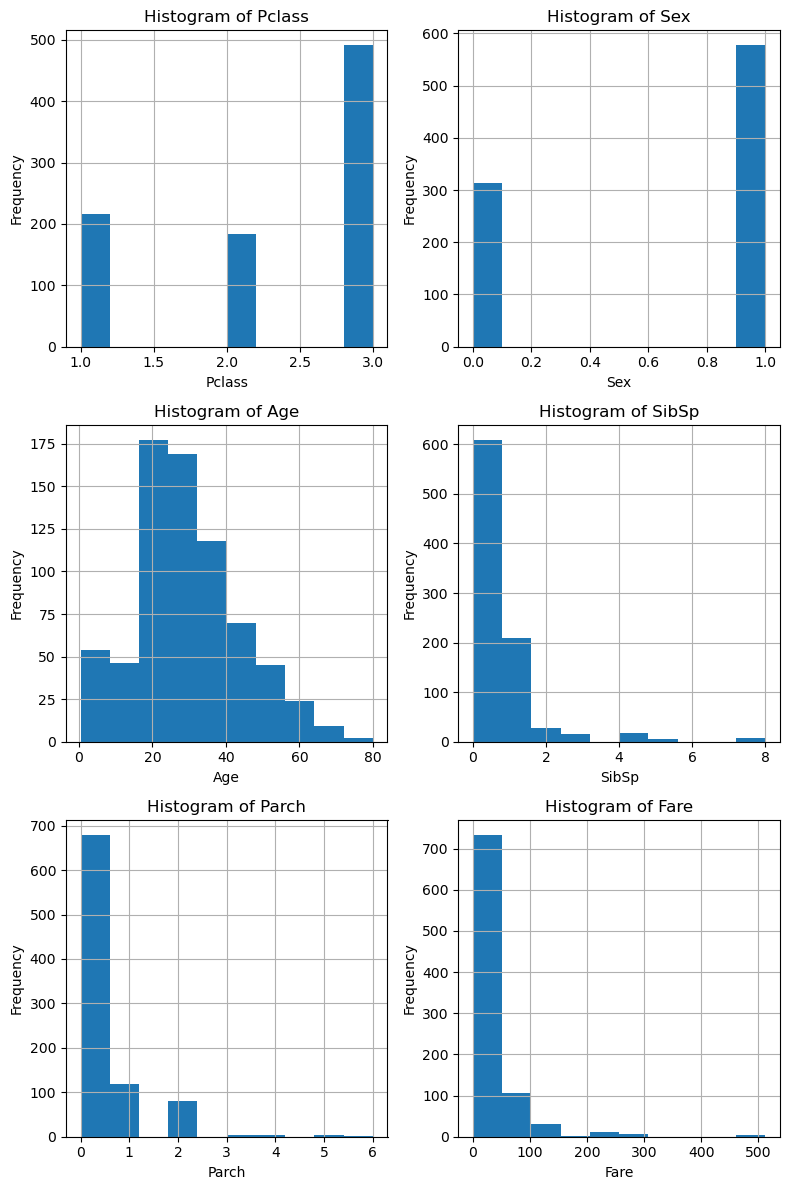

In [91]:
# HISTOGRAMA DE CADA FEATURE

# Determine the size of the grid
num_cols = len(x.columns)
num_rows = (num_cols + 1) // 2  # Round up if odd number of columns

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(8, num_rows * 4))  # Adjust figsize as needed

# Flatten the axes array if there's only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Plot histograms for each feature
for i, column in enumerate(x.columns):
    ax = axes[i // 2, i % 2]  # Select the current subplot
    df[column].hist(ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [92]:
# SPLIT TESTE E TREINO
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [95]:
# TRANSFORMAR DADOS
x_transf = x.copy()
'''
pt = PowerTransformer()
x_transf[['SibSp', 'Parch', 'Fare']] = pt.fit_transform(x_transf[['SibSp', 'Parch', 'Fare']])

'''
scaler = StandardScaler()
x_transf[['Age', 'SibSp', 'Parch', 'Fare']] = scaler.fit_transform(x_transf[['Age', 'SibSp', 'Parch', 'Fare']])


df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


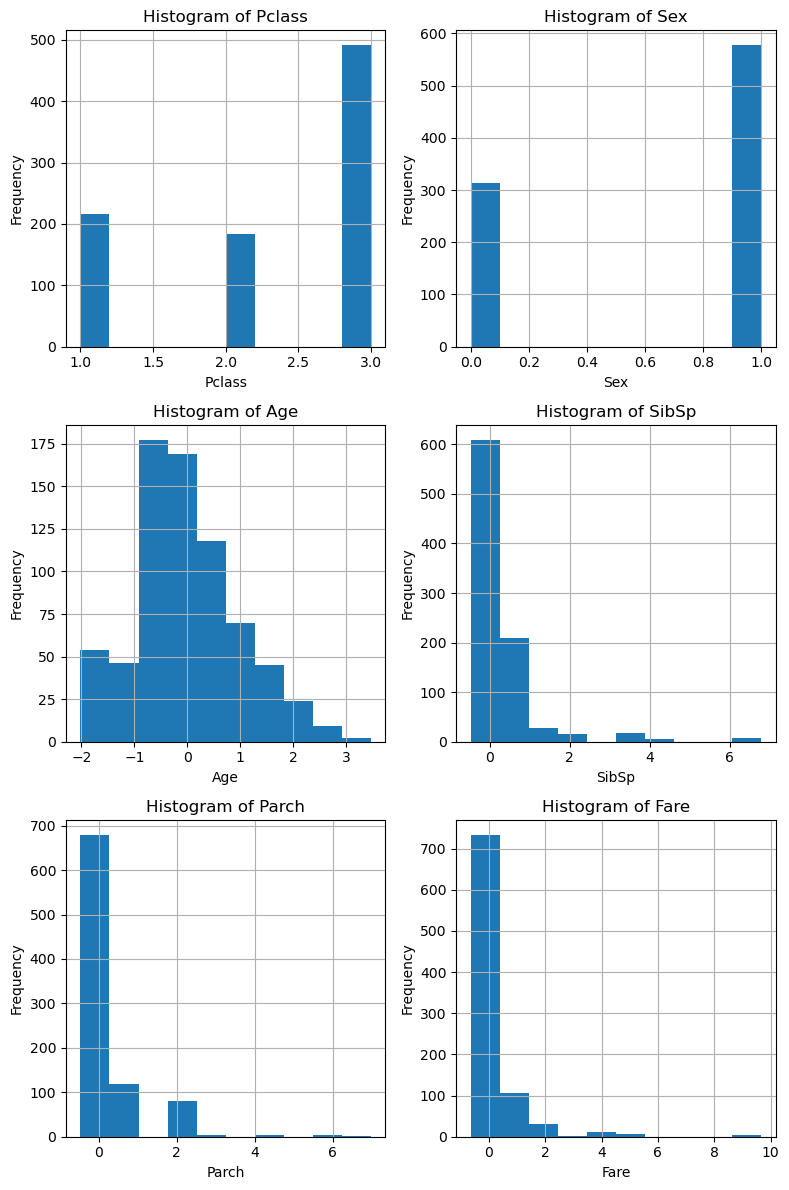

In [94]:
# HISTOGRAMA DE CADA FEATURE

# Determine the size of the grid
num_cols = len(x_transf.columns)
num_rows = (num_cols + 1) // 2  # Round up if odd number of columns

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(8, num_rows * 4))  # Adjust figsize as needed

# Flatten the axes array if there's only one row
if num_rows == 1:
    axes = axes.reshape(1, -1)

# Plot histograms for each feature
for i, column in enumerate(x_transf.columns):
    ax = axes[i // 2, i % 2]  # Select the current subplot
    x_transf[column].hist(ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()